In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [4]:
#sc.settings.verbosity = 3   # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_header()
#sc.settings.set_figure_params(dpi=80, facecolor='white')

In [55]:
%%HTML
<img src="img/anndata.svg" style="height:500px">

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:58:09.338190. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


AnnData.X stores the count matrix<br>
AnnData.obs stores metadata about the observations (cells)<br>
AnnData.var stores metadata about the variables (genes)<br>
AnnData.uns stores any additional, unstructured information we decide to attach later

In [6]:
adata = sc.read_10x_h5('vdj_v1_hs_pbmc3_filtered_feature_bc_matrix.h5') # the directory with the `.h5` file

reading vdj_v1_hs_pbmc3_filtered_feature_bc_matrix.h5 

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(0:00:00.92)


In [11]:
adata

View of AnnData object with n_obs × n_vars = 7231 × 33538 
    var: 'gene_ids', 'feature_types', 'genome'

In [12]:
adata.var_names_make_unique()

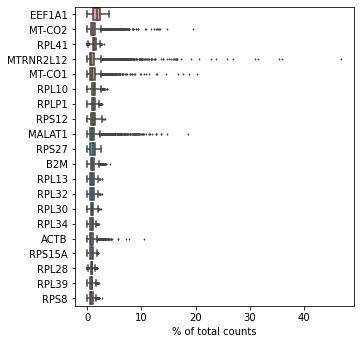

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


filtered out 10 cells that have less than 200 genes expressed
filtered out 16221 genes that are detected in less than 3 cells


In [16]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, inplace=True)

In [17]:
adata

AnnData object with n_obs × n_vars = 7221 × 17317 
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

... storing 'feature_types' as categorical
... storing 'genome' as categorical
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarn

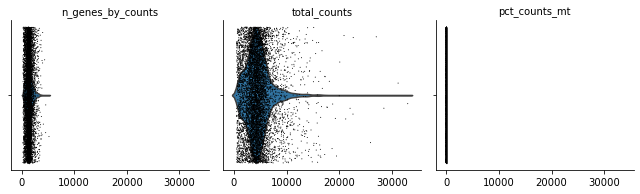

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


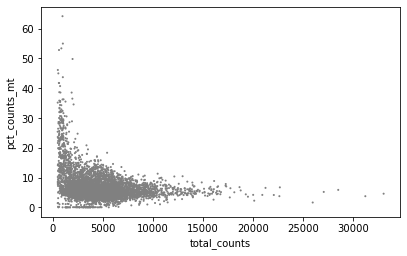

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/anndata/base.py:1618: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


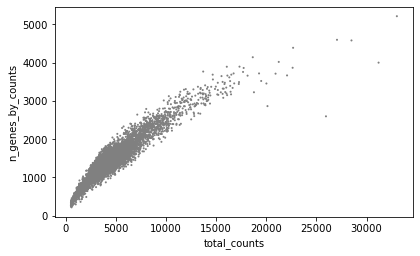

In [19]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [20]:
adata = adata[adata.obs.n_genes_by_counts < 3500, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:14:24.176924. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [22]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:20:46.220050. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
Trying to set attribute `.obs` of view, making a copy.


In [23]:
sc.pp.log1p(adata)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:21:03.105697. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [24]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:21:19.472017. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:21:45.998019. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


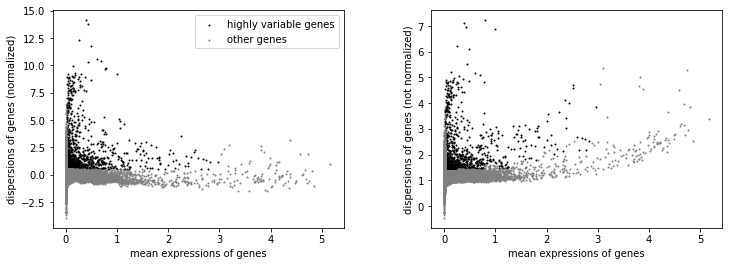

In [25]:
sc.pl.highly_variable_genes(adata)

In [26]:
adata

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:22:16.423505. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


AnnData object with n_obs × n_vars = 7051 × 17317 
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [27]:
adata.raw = adata

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:22:46.739303. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [29]:
adata = adata[:, adata.var.highly_variable]

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:23:40.269424. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [30]:
adata

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:23:47.194102. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


View of AnnData object with n_obs × n_vars = 7051 × 1706 
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [31]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:24:21.518077. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:25.87)


In [32]:
sc.pp.scale(adata, max_value=10)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:25:09.818805. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [33]:
sc.tl.pca(adata, svd_solver='arpack')

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:25:38.877528. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:01.04)


/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:26:31.964368. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


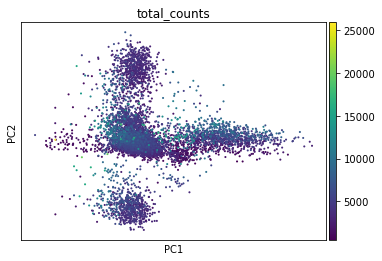

In [35]:
sc.pl.pca(adata, color='total_counts')

In [36]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:27:27.559141. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:05.51) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [38]:
sc.tl.umap(adata)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:29:34.617027. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


computing UMAP
    using 'X_pca' with n_pcs = 40
    finished (0:00:26.30) --> added
    'X_umap', UMAP coordinates (adata.obsm)


/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:30:32.200466. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


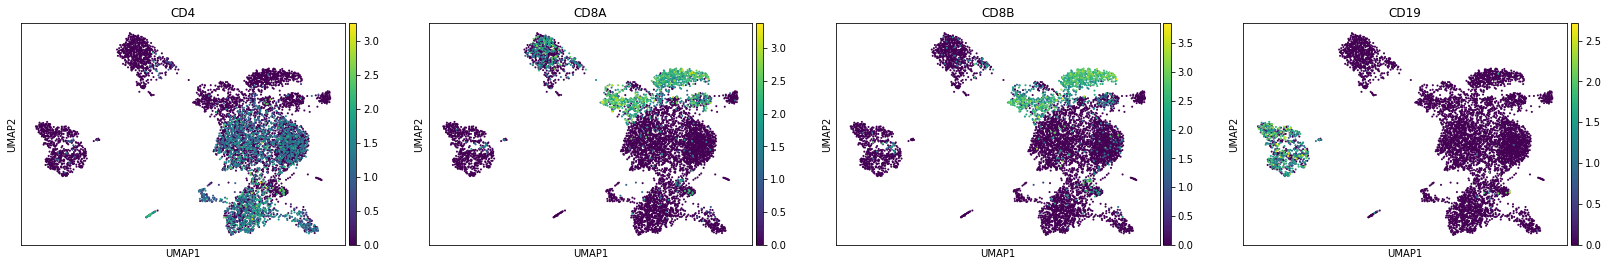

In [39]:
sc.pl.umap(adata, color=['CD4', 'CD8A', 'CD8B', 'CD19'])

In [41]:
sc.tl.leiden(adata)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:32:52.848380. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


running Leiden clustering
    finished (0:00:00.64) --> found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical)


/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:33:24.499842. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


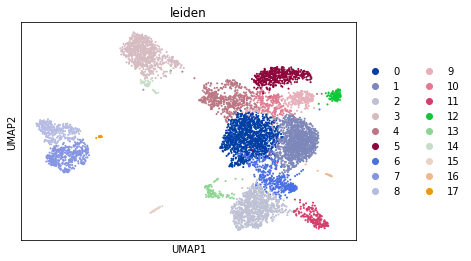

In [42]:
sc.pl.umap(adata, color=['leiden'])

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:34:11.125449. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


ranking genes
    finished (0:00:08.79) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


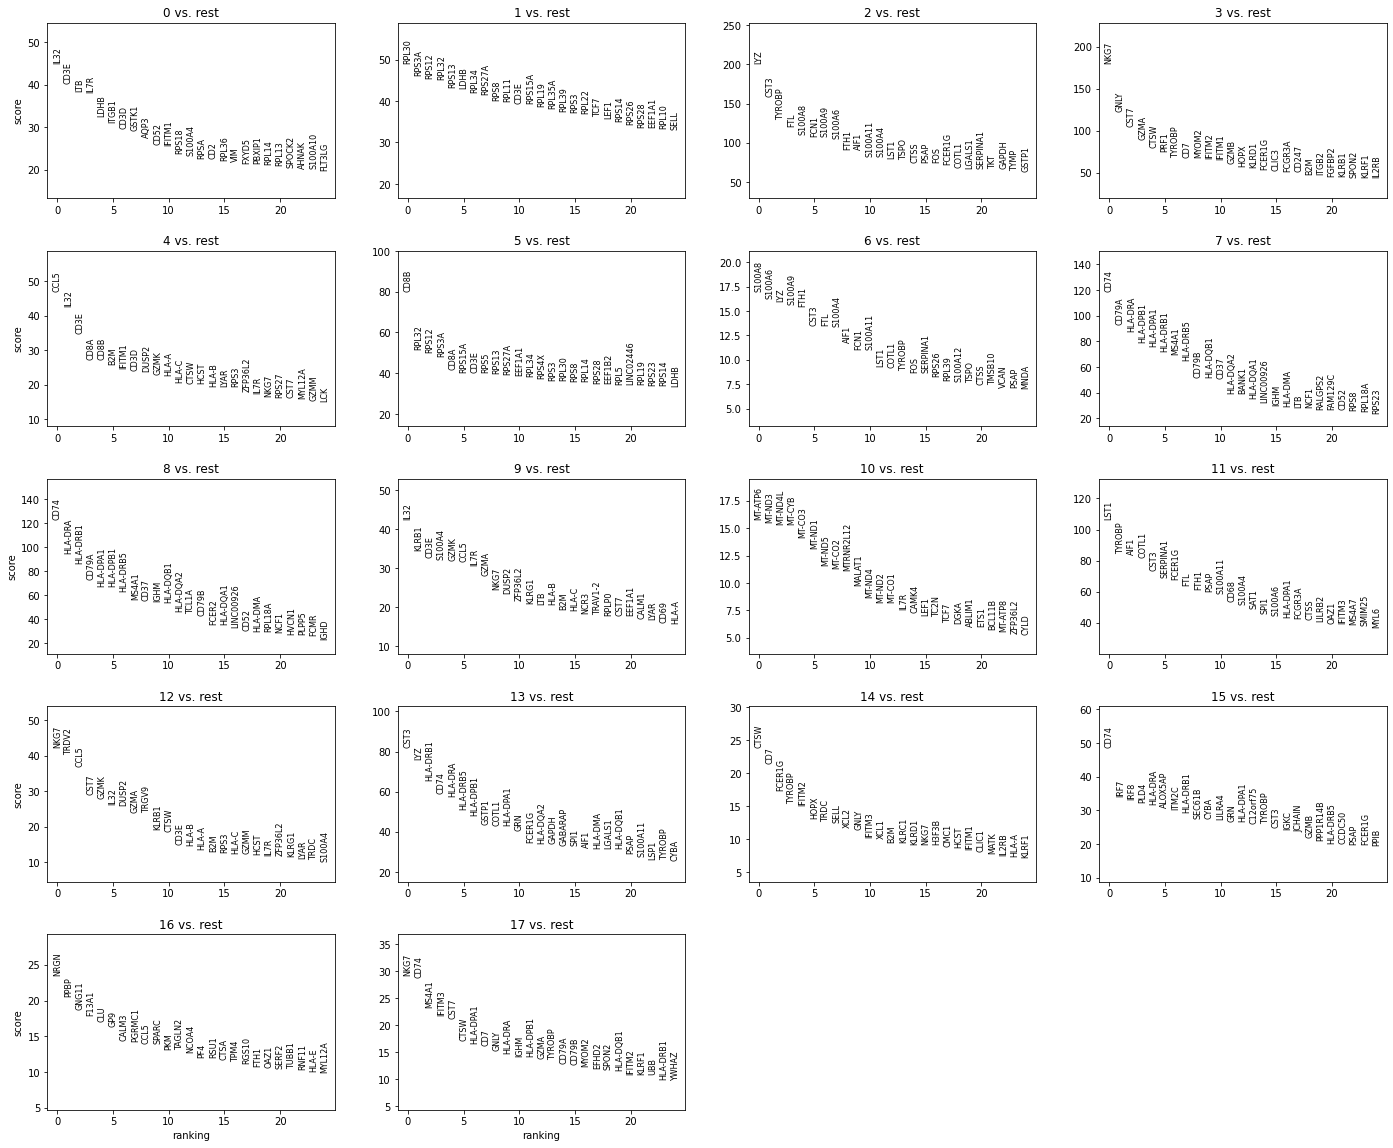

In [43]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [44]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:35:34.867577. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,IL32,RPL30,LYZ,NKG7,CCL5,CD8B,S100A8,CD74,CD74,IL32,MT-ATP6,LST1,NKG7,CST3,CTSW,CD74,NRGN,NKG7
1,CD3E,RPS3A,CST3,GNLY,IL32,RPL32,S100A6,CD79A,HLA-DRA,KLRB1,MT-ND3,TYROBP,TRDV2,LYZ,CD7,IRF7,PPBP,CD74
2,LTB,RPS12,TYROBP,CST7,CD3E,RPS12,LYZ,HLA-DRA,HLA-DRB1,CD3E,MT-ND4L,AIF1,CCL5,HLA-DRB1,FCER1G,IRF8,GNG11,MS4A1
3,IL7R,RPL32,FTL,GZMA,CD8A,RPS3A,S100A9,HLA-DPB1,CD79A,S100A4,MT-CYB,COTL1,CST7,CD74,TYROBP,PLD4,F13A1,IFITM3
4,LDHB,RPS13,S100A8,CTSW,CD8B,CD8A,FTH1,HLA-DPA1,HLA-DPA1,GZMK,MT-CO3,CST3,GZMK,HLA-DRA,IFITM2,HLA-DRA,CLU,CST7


In [45]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:37:19.423127. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,13_n,13_p,14_n,14_p,15_n,15_p,16_n,16_p,17_n,17_p
0,IL32,0.000000e+00,RPL30,0.0,LYZ,0.0,NKG7,0.0,CCL5,1.233866e-202,...,CST3,2.167879e-113,CTSW,1.314634e-26,CD74,2.694711e-36,NRGN,1.975938e-11,NKG7,9.759825e-11
1,CD3E,4.429333e-300,RPS3A,0.0,CST3,0.0,GNLY,0.0,IL32,3.553190e-231,...,LYZ,1.528704e-111,CD7,5.674161e-25,IRF7,8.841159e-26,PPBP,1.002188e-10,CD74,5.406265e-11
2,LTB,8.778743e-262,RPS12,0.0,TYROBP,0.0,CST7,0.0,CD3E,4.228660e-175,...,HLA-DRB1,1.825769e-90,FCER1G,1.313994e-21,IRF8,1.767195e-25,GNG11,2.840142e-10,MS4A1,1.506936e-09
3,IL7R,1.167143e-236,RPL32,0.0,FTL,0.0,GZMA,0.0,CD8A,1.075916e-103,...,CD74,2.030832e-90,TYROBP,1.346320e-19,PLD4,5.867923e-25,F13A1,4.934981e-10,IFITM3,9.906821e-10
4,LDHB,9.770183e-197,RPS13,0.0,S100A8,0.0,CTSW,0.0,CD8B,3.236087e-103,...,HLA-DRA,1.839652e-81,IFITM2,6.108472e-19,HLA-DRA,7.805459e-27,CLU,8.520027e-10,CST7,2.647038e-09


In [47]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:40:26.149054. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:40:27.088199. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


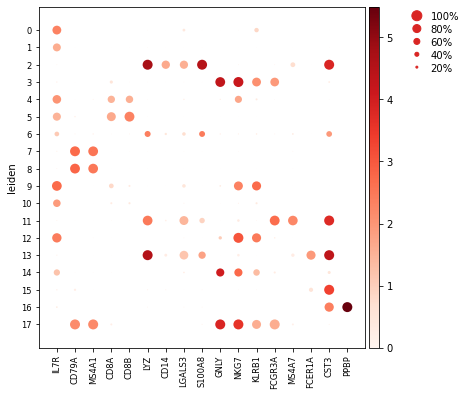

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[5.949999999999999, 0, 0.2, 0.5, 0.25])

In [48]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-22 02:42:25.218991. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alexey/.conda-envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py

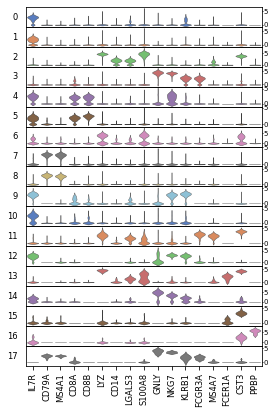

In [50]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);